### Tranformation  of images into a specific features using wavelet trasnformation


In [1]:
import cv2
import numpy as np
import pywt
from scipy.stats import skew, kurtosis
from skimage.measure import shannon_entropy
import pandas as pd
import os

# Calculating features for a single image
def calculate_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    wavelet = 'haar'  # You can choose other wavelets
    level = 3         # Adjust the decomposition level as needed
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # Calculate features
    v1 = np.var(coeffs[0])  # Variance
    v2 = skew(coeffs[0].flatten())  # Skewness
    v3 = kurtosis(coeffs[0].flatten())  # Kurtosis
    v4 = shannon_entropy(coeffs[0])  # Entropy
    
    return [v1, v2, v3, v4]

feature_vectors = []

# image directory
image_directory = "C:/Users/Bamwesigye Calvin/Pictures/banknotes"

for filename in os.listdir(image_directory):
    if filename.endswith('.jpg'):  # Adjust the file extension as needed
        image_path = os.path.join(image_directory, filename)      
        features = calculate_features(image_path)
        feature_vectors.append(features)

column_names = ['v1', 'v2', 'v3', 'v4']
table = pd.DataFrame(feature_vectors, columns=column_names)
table

table.to_csv('image_features.csv', index=False)


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
features = pd.read_csv('image_features.csv')
features

,v1,v2,v3,v4
0,73720.238368,0.217987,-0.625184,12.622773
1,213698.616542,0.814687,-0.792076,12.909162
2,221282.088575,0.801097,-0.885428,12.818257
3,252797.438896,0.954481,-0.637465,12.731984
4,249295.127972,0.766057,-0.977507,12.857121
5,193813.067762,0.939747,-0.417798,12.759364
6,227395.452751,0.880079,-0.605520,12.830624
7,136731.281326,0.976467,-0.255481,12.701449
8,149221.732656,0.802826,-0.670507,12.741874
9,278487.593372,0.698031,-1.172082,12.903782


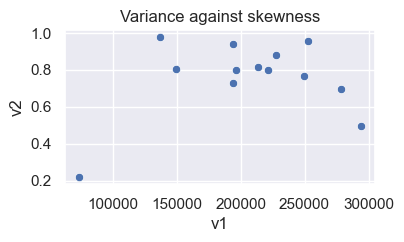

In [11]:
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()

plt.figure(figsize=(4,2))
plt.title('Variance against skewness')
sbn.scatterplot(x = 'v1',y = 'v2', data=features)
plt.show()

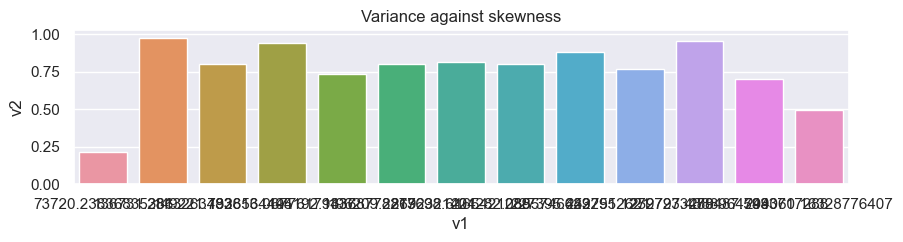

In [19]:
plt.figure(figsize=(10,2))
plt.title('Variance against skewness')
sbn.barplot(x = 'v1',y = 'v2', data=features)
plt.savefig('variance vs skewness')
plt.show()

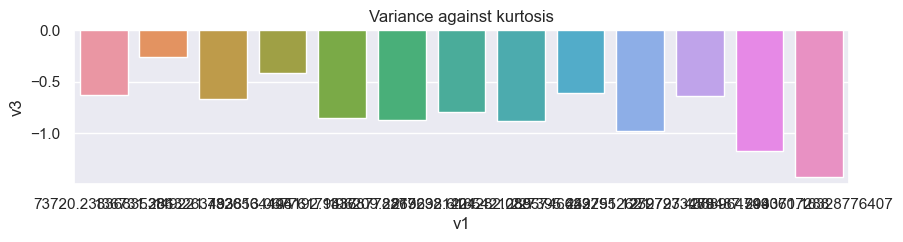

In [22]:
plt.figure(figsize=(10,2))
plt.title('Variance against kurtosis')
sbn.barplot(x = 'v1',y = 'v3', data=features)
plt.savefig('variance vs kurtosis')
plt.show()

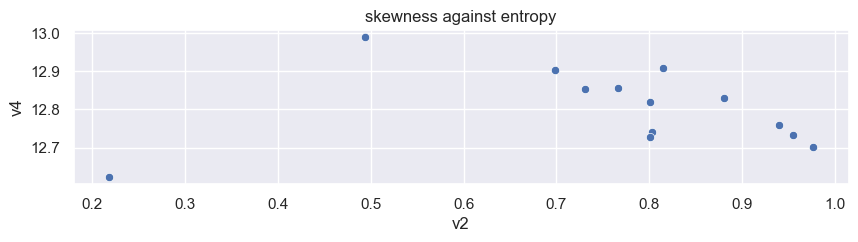

In [26]:
plt.figure(figsize=(10,2))
plt.title('skewness against entropy')
sbn.scatterplot(x = 'v2',y = 'v4', data=features)
# plt.savefig('variance vs skewness')
plt.show()